<a href="https://colab.research.google.com/github/FilippMaksimov/Net.Statistics/blob/main/Stat_Maksimov_F_Lab04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Описание задачи

![banner](https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-original.jpg)

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex - портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex.

### Описание набора данных
Профессор Оук скопировал все содержимое в память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

In [ ]:
import warnings
# Отключение предупреждений (warnings)
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

pokemon = pd.read_csv('https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv', on_bad_lines='skip')
pokemon.head()

# Обратите внимание, что у покемона может быть один или два класса.
# Если у покемона два класса, считается, что они имеют одинаковую значимость.

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [ ]:
print(len(pokemon))

800


<div class="alert alert-info">
<b>Задание № 1:</b>
    
Профессор Оук подозревает, что покемоны в классе `Grass` имеют более сильную обычную атаку, чем покемоны в классе `Rock`. Проверьте, прав ли он, и убедите его в своём выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>

In [ ]:
#Поиск покемонов, которые относятся так к классу Grass, так и к классу Rock
rock_grass = pokemon[(pokemon['Class 1'] == 'Rock') & (pokemon['Class 2'] == 'Grass')]
rock_grass_id = rock_grass.index + 1
rock_grass

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
377,378,Lileep,Rock,Grass,66,41,77,61,87,23,False
378,379,Cradily,Rock,Grass,86,81,97,81,107,43,False


In [ ]:
rock_grass_id

Index([378, 379], dtype='int64')

In [ ]:
#Проверим вторую комбинацию классов
grass_rock = pokemon[(pokemon['Class 1'] == 'Grass') & (pokemon['Class 2'] == 'Rock')]
grass_rock

#Таких строк в датафрейме нет, поэтому для исключения будем использовать предыдущий набор

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary


In [ ]:
#Исключение вышеупомянутых данных
droped_pokemons = pokemon[~pokemon['pid'].isin(rock_grass_id)]
print(f"После очистки мы имеем {len(droped_pokemons)} набором покемонов. Осталось отфильровать датафрейм по упомнятым классам")

После очистки мы имеем 798 набором покемонов. Осталось отфильровать датафрейм по упомнятым классам


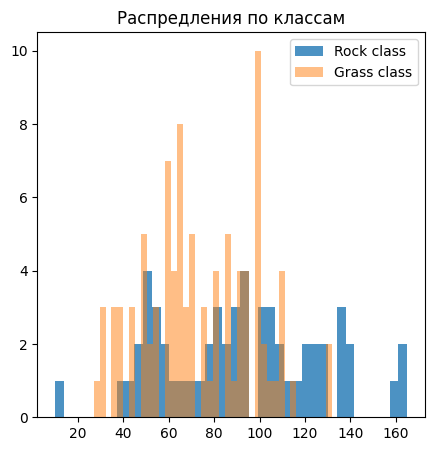

In [ ]:
rock_p = droped_pokemons[(droped_pokemons['Class 1'] == 'Rock') | (droped_pokemons['Class 2'] == 'Rock')]
grass_p = droped_pokemons[(droped_pokemons['Class 1'] == 'Grass') | (droped_pokemons['Class 2'] == 'Grass')]
plt.figure(figsize=(5,5))
plt.hist(rock_p['Attack'], bins=40, alpha=0.8, label='Rock class')
plt.hist(grass_p['Attack'], bins=40, alpha=0.5, label='Grass class')
plt.legend(loc='upper right')
plt.title('Распредления по классам')
plt.show()

In [ ]:
print(grass_p['Attack'].mean())
print(rock_p['Attack'].mean())

73.73118279569893
91.78571428571429


In [ ]:
#Тк из условия задания мы предпологаем, что распределение обычных атак является нормальным дял всех классов покемонов,
#мы можем перейти к f-тесту, чтобы проверить равенство дисперсий
def f_test(group1, group2):
  f = np.var(group1, ddof=1) / np.var(group2, ddof=1)
  nun = group1.size - 1
  dun = group2.size - 1
  pval = 1 - st.f.cdf(f, nun, dun)
  return f, pval

In [ ]:
stat1, p1 = f_test(grass_p['Attack'], rock_p['Attack'])
print(f"Статистика = {stat1:.3f}, p = {p1:5f}")
if p1 > 0.05:
  print('Не отклоняем нулевую гипотезу, дисперсии, вероятно, одинаковые')
else:
  print('Отклоняем нулевую гипотезу, дисперсии, вероятно, различаются')

Статистика = 0.483, p = 0.999009
Не отклоняем нулевую гипотезу, дисперсии, вероятно, одинаковые


In [ ]:
#Тк f-тест показал, что дисперсии скорее всего отличаются,
#то при применении t-критерия Стьюдента мы будем использовать поправку Уэлча
stat1, p1 = st.ttest_ind(rock_p['Attack'], grass_p['Attack'], equal_var=False)
print(f"Статистика = {stat1:.3f}, p = {p1:5f}")
if p1 > 0.05:
  print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
  print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

#Вывод. Разлчие между классами по силе обычной атаки, как и предполагалось, есть.

Статистика = 3.417, p = 0.000964
Отклоняем нулевую гипотезу, средние, вероятно, различаются


In [ ]:
#Можно выполнить проверку односторонней гипотезы со следующими нулевой и альтернативной гипотезами:
#H0 Grass > Rock
#H1 Grass < Rock
stat1, p1 = st.ttest_ind(grass_p['Attack'], rock_p['Attack'], equal_var=False, alternative='less')
print(f"Статистика = {stat1:.3f}, p = {p1:5f}")
if p1 > 0.05:
  print('Не отклоняем нулевую гипотезу')
else:
  print('Отклоняем нулевую гипотезу')

#Исходя из этого можно сделать вывод о том, что покемоны из класса Grass в среднем имеют меньшую атаку, чем в классе Rock
#Следовательно, утверждение профессора Оука статистически не подтверждается.

Статистика = -3.417, p = 0.000482
Отклоняем нулевую гипотезу


<div class="alert alert-info">
<b>Задание № 2:</b>
    
Профессор Оук уже долго не может спать по ночам, ведь его волнует вопрос, а правда ли, что покемоны в классе `Water` в среднем быстрее, чем покемоны в классе `Normal`.
    
    
Проверьте, прав ли он, и убедите его в своём выводе статистически.
    
Примечание: если есть покемоны, которые относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.
</div>

In [ ]:
#Поиск покемонов, которые относятся так к классу Water, так и к классу Normal
water_norm = pokemon[(pokemon['Class 1'] == 'Normal') & (pokemon['Class 2'] == 'Water') | (pokemon['Class 1'] == 'Water') & (pokemon['Class 2'] == 'Normal')]
id_to_remove = water_norm.index + 1
droped_pokemons2 = pokemon[~pokemon['pid'].isin(id_to_remove)]
print(f"После очистки мы имеем {len(droped_pokemons2)} набором покемонов. Осталось отфильровать датафрейм по упомнятым классам")

После очистки мы имеем 799 набором покемонов. Осталось отфильровать датафрейм по упомнятым классам


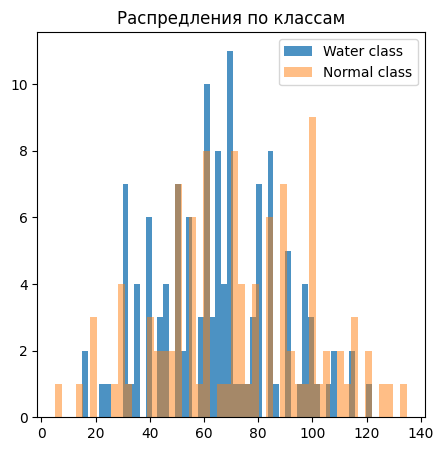

In [ ]:
water_p = droped_pokemons2[(droped_pokemons2['Class 1'] == 'Water') | (droped_pokemons2['Class 2'] == 'Water')]
norm_p = droped_pokemons2[(droped_pokemons2['Class 1'] == 'Normal') | (droped_pokemons2['Class 2'] == 'Normal')]
plt.figure(figsize=(5,5))
plt.hist(water_p['Speed'], bins=50, alpha=0.8, label='Water class')
plt.hist(norm_p['Speed'], bins=50, alpha=0.5, label='Normal class')
plt.legend(loc='upper right')
plt.title('Распредления по классам')
plt.show()

In [ ]:
print(water_p['Speed'].sum())
print(water_p['Speed'].count())
print(water_p['Speed'].mean())
print('------------------------')
print(norm_p['Speed'].sum())
print(norm_p['Speed'].count())
print(norm_p['Speed'].mean())

8117
125
64.936
------------------------
7298
101
72.25742574257426


Text(0.5, 1.0, 'Плотность распредления средних значений обычной атаки')

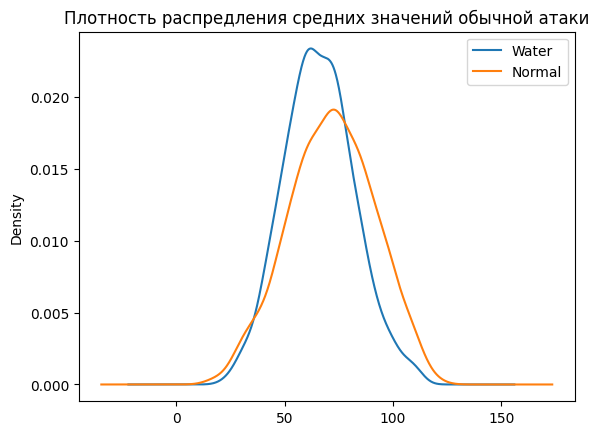

In [ ]:
#Попробуем применить Bootstrap
boot_ld_w = []
boot_ld_n= []
for i in range(1000):
  boot_mean_w = water_p.sample(frac=0.02, replace=True)['Speed'].mean()
  boot_ld_w.append(boot_mean_w)
  boot_mean_n = norm_p.sample(frac=0.02, replace=True)['Speed'].mean()
  boot_ld_n.append(boot_mean_n)
boot_ld2 = pd.DataFrame({'Water': boot_ld_w, 'Normal': boot_ld_n})
boot_ld2.plot(kind='density')
plt.title('Плотность распредления средних значений обычной атаки')

In [ ]:
#Проверка равенства дисперсий
stat2, p2 = f_test(boot_ld2['Normal'], boot_ld2['Water'])
print(f"Статистика = {stat2:.3f}, p = {p2:5f}")
if p2 > 0.05:
  print('Не отклоняем нулевую гипотезу, дисперсии, вероятно, одинаковые')
else:
  print('Отклоняем нулевую гипотезу, дисперсии, вероятно, различаются')

Статистика = 1.464, p = 0.000000
Отклоняем нулевую гипотезу, дисперсии, вероятно, различаются


In [ ]:
#Тк f-тест показал, что дисперсии скорее всего отличаются,
#то при применении t-критерия Стьюдента мы будем использовать поправку Уэлча
stat2, p2 = st.ttest_ind(boot_ld2['Normal'], boot_ld2['Water'], equal_var=False)
print(f"Статистика = {stat2:.3f}, p = {p2:5f}")
if p2 > 0.05:
  print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
  print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

#Вывод. Разлчие между классами по скорости, как и предполагалось, есть.

Статистика = 7.087, p = 0.000000
Отклоняем нулевую гипотезу, средние, вероятно, различаются


In [ ]:
#Можно выполнить проверку односторонней гипотезы со следующими нулевой и альтернативной гипотезами:
#H0 Water > Normal
#H1 Water < Normal
stat2, p2 = st.ttest_ind(boot_ld2['Water'], boot_ld2['Normal'], equal_var=False, alternative='less')
print(f"Статистика = {stat1:.3f}, p = {p1:5f}")
if p2 > 0.05:
  print('Не отклоняем нулевую гипотезу')
else:
  print('Отклоняем нулевую гипотезу')

#Исходя из этого можно сделать вывод о том, что покемоны из класса Water в среднем имеют даже меньшую атаку, чем в классе Normal
#Следовательно, утверждение профессора Оука статистически не подтверждается.

Статистика = -3.417, p = 0.000482
Отклоняем нулевую гипотезу


<div class="alert alert-info">
<b>Задание № 3:</b>
    
Профессор Оук тот еще безумец. Он изобрёл сыворотку, способную ускорить покемона. Однако мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своём выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [ ]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill', 'Mega Alakazam',
                    'Deoxys Normal Forme', 'Mega Lopunny']
grouped_data = pokemon.copy()
grouped_data['Category'] = grouped_data['Name'].apply(lambda x: 'Treathed' if x in treathed_pokemon else 'Not treathed')

In [ ]:
grouped_data.groupby('Category')['Category'].count()
#Имеем 796 покемонов, которым не вводили сыворотку

Category
Not treathed    796
Treathed          4
Name: Category, dtype: int64

In [ ]:
grouped_data.groupby('Category')['Speed'].sum()

Category
Not treathed    54042
Treathed          580
Name: Speed, dtype: int64

In [ ]:
grouped_data.groupby('Category')['Speed'].mean()

Category
Not treathed     67.89196
Treathed        145.00000
Name: Speed, dtype: float64

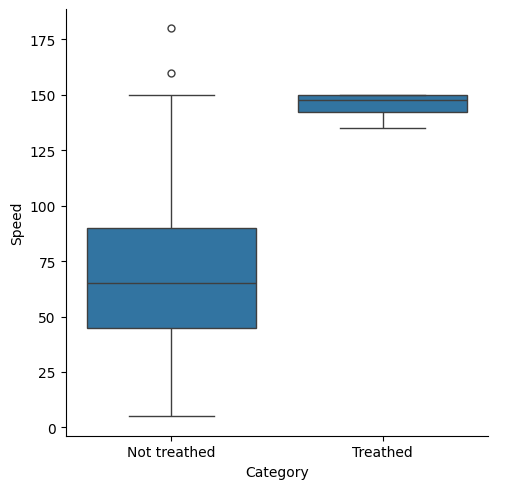

In [ ]:
sns.catplot(x='Category', y='Speed', data=grouped_data, kind='box')

<Axes: ylabel='Density'>

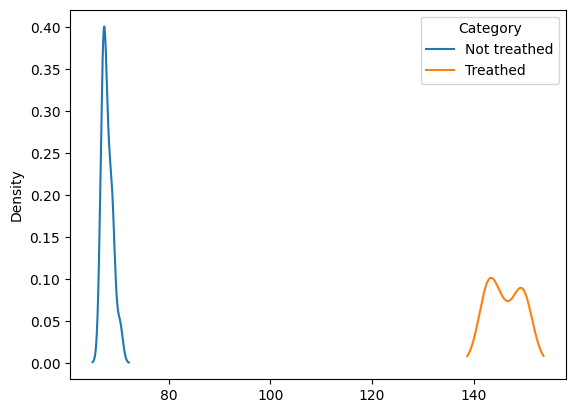

In [ ]:
#Из условия задания мы ппредполагаем, что распределение скорости движения нормальное
#Собираем статистику по средним bootstrap
boot_ld3 = []
for i in range(15):
  boot_mean = grouped_data.sample(frac=1, replace=True).groupby('Category')['Speed'].mean()
  boot_ld3.append(boot_mean)
boot_ld3 = pd.DataFrame(boot_ld3)
boot_ld3.plot(kind='density')

In [ ]:
#Снова используем f-тест для проверки равенства дисперсий в этих двух группах
stat3, p3 = f_test(boot_ld3['Not treathed'], boot_ld3['Treathed'])
print(f"Статистика = {stat3:.3f}, p = {p3:5f}")
if p3 > 0.05:
  print('Не отклоняем нулевую гипотезу, дисперсии, вероятно, одинаковые')
else:
  print('Отклоняем нулевую гипотезу, дисперсии, вероятно, различаются')

Статистика = 0.100, p = 0.999945
Не отклоняем нулевую гипотезу, дисперсии, вероятно, одинаковые


In [ ]:
stat3, p3 = st.ttest_ind(boot_ld3['Not treathed'], boot_ld3['Treathed'])
print(f"Статистика = {stat3:.3f}, p = {p3:5f}")
if p3 > 0.05:
  print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
  print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

#Вывод. Соворотка, скорее всего, действует

Статистика = -90.882, p = 0.000000
Отклоняем нулевую гипотезу, средние, вероятно, различаются


In [ ]:
#Дополнительно выполним проверку односторонней гипотезы со следующими нулевой и альтернативной гипотезами:
#H0 Treated > Not treated
#H1 Treated < Not treated
stat3, p3 = st.ttest_ind(boot_ld3['Treathed'], boot_ld3['Not treathed'], alternative='less')
print(f"Статистика = {stat3:.3f}, p = {p3:5f}")
if p3 > 0.05:
  print('Не отклоняем нулевую гипотезу')
else:
  print('Отклоняем нулевую гипотезу')

#Исходя из этого можно сделать вывод о том, что сыворотка действительно работает.

Статистика = 90.882, p = 1.000000
Не отклоняем нулевую гипотезу


<div class="alert alert-info">
<b>Задание № 4:</b>
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако профессор не очень уверен, что они лучше остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов?

А произведение этих же параметров?

Найдите ответы на эти вопросы и убедите всех в своём выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [ ]:
#Сумма HP, Attack, Defense
sum_data = pokemon.copy()
sum_data = sum_data.assign(Sum = lambda x: x['HP'] + x['Attack'] + x['Defense'])
#Произведение HP, Attack, Defense
mult_data = pokemon.copy()
mult_data = mult_data.assign(Mult = lambda x: x['HP'] * x['Attack'] * x['Defense'])

Анализ суммы переменных

In [ ]:
sum_data.groupby('Legendary').Legendary.count()

Legendary
False    735
True      65
Name: Legendary, dtype: int64

In [ ]:
sum_data.groupby('Legendary').Sum.sum()

Legendary
False    157592
True      20090
Name: Sum, dtype: int64

In [ ]:
sum_data.groupby('Legendary').Sum.mean()

Legendary
False    214.410884
True     309.076923
Name: Sum, dtype: float64

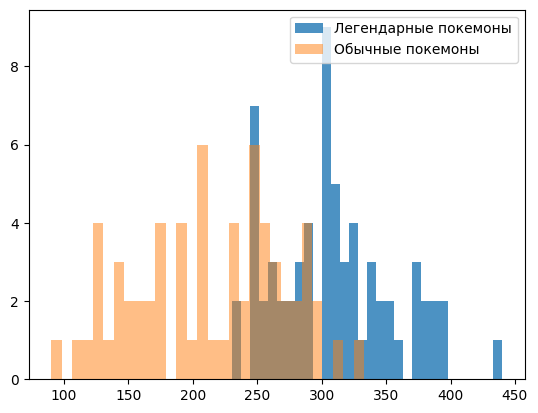

In [ ]:
sum_data_leg = sum_data.loc[sum_data.Legendary == True].sample(n=65)
sum_data_ord = sum_data.loc[sum_data.Legendary == False].sample(n=65)
plt.hist(sum_data_leg['Sum'], bins=30, alpha=0.8, label='Легендарные покемоны')
plt.hist(sum_data_ord['Sum'], bins=30, alpha=0.5, label='Обычные покемоны')
plt.legend(loc='upper right')
plt.show()

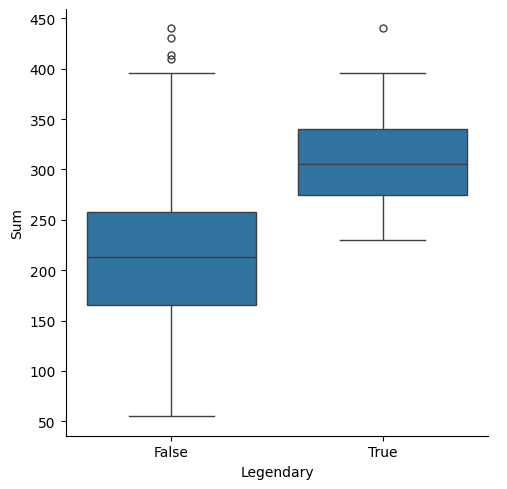

In [ ]:
sns.catplot(x='Legendary', y='Sum', data=sum_data, kind='box')

<Axes: ylabel='Density'>

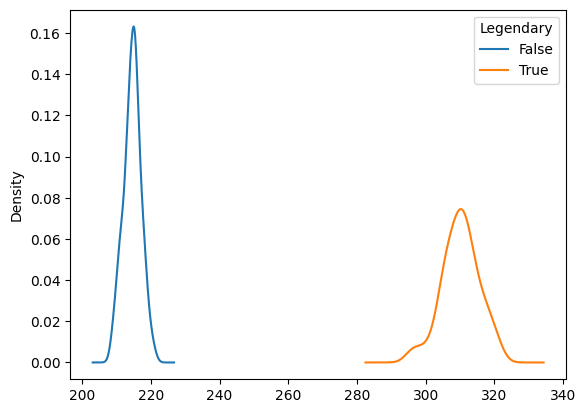

In [ ]:
# Применение Bootstrap
boot_ld4 = []
for i in range(100):
  boot_mean = sum_data.sample(frac=1, replace=True).groupby('Legendary')['Sum'].mean()
  boot_ld4.append(boot_mean)
boot_ld4 = pd.DataFrame(boot_ld4)
boot_ld4.plot(kind='density')

In [ ]:
#Проверка равенства дисперсий
stat4, p4 = f_test(boot_ld4[True], boot_ld4[False])
print(f"Статистика = {stat4:.3f}, p = {p4:5f}")
if p4 > 0.05:
  print('Не отклоняем нулевую гипотезу, дисперсии, вероятно, одинаковые')
else:
  print('Отклоняем нулевую гипотезу, дисперсии, вероятно, различаются')

Статистика = 4.690, p = 0.000000
Отклоняем нулевую гипотезу, дисперсии, вероятно, различаются


In [ ]:
stat4, p4 = st.ttest_ind(boot_ld4[True], boot_ld4[False], equal_var=False)
print(f"Статистика = {stat4:.3f}, p = {p4:5f}")
if p4 > 0.05:
  print('Не отклоняем нулевую гипотезу, среднее сумм, вероятно, одинаковые')
else:
  print('Отклоняем нулевую гипотезу, среднее сумм, вероятно, различаются')

#Вывод. Существует статистически значимая разница сумм HP, Attack, Defend мужду 2 группами

Статистика = 161.850, p = 0.000000
Отклоняем нулевую гипотезу, среднее сумм, вероятно, различаются


In [ ]:
#Можно выполнить проверку односторонней гипотезы со следующими нулевой и альтернативной гипотезами:
#H0 Sum(Legendary) > Sum(Ord)
#H1 Sum(Legendary) < Sum(Ord)
stat4, p4 = st.ttest_ind(boot_ld4[True], boot_ld4[False], equal_var=False, alternative='less')
print(f"Статистика = {stat4:.3f}, p = {p4:5f}")
if p4 > 0.05:
  print('Не отклоняем нулевую гипотезу')
else:
  print('Отклоняем нулевую гипотезу')

#Исходя из этого можно сделать вывод о том, что сумма HP, Attack, Defend у легендарны покемонов в среднем больше, чем у остальных

Статистика = 161.850, p = 1.000000
Не отклоняем нулевую гипотезу


Анализ произведения

In [ ]:
mult_data.groupby('Legendary').Legendary.count()

Legendary
False    735
True      65
Name: Legendary, dtype: int64

In [ ]:
mult_data.groupby('Legendary').Mult.sum()

Legendary
False    312405421
True      70586205
Name: Mult, dtype: int64

In [ ]:
mult_data.groupby('Legendary').Mult.mean()

Legendary
False    4.250414e+05
True     1.085942e+06
Name: Mult, dtype: float64

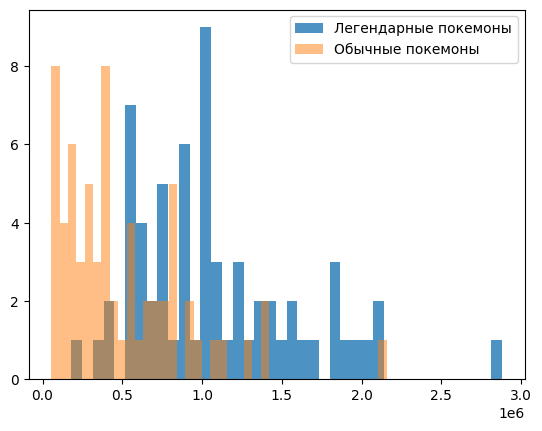

In [ ]:
mult_data_leg = mult_data.loc[mult_data.Legendary == True].sample(n=65)
mult_data_ord = mult_data.loc[mult_data.Legendary == False].sample(n=65)
plt.hist(mult_data_leg['Mult'], bins=40, alpha=0.8, label='Легендарные покемоны')
plt.hist(mult_data_ord['Mult'], bins=40, alpha=0.5, label='Обычные покемоны')
plt.legend(loc='upper right')
plt.show()

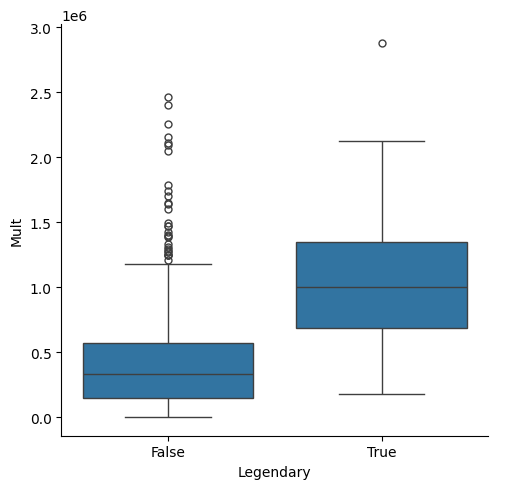

In [ ]:
sns.catplot(x='Legendary', y='Mult', data=mult_data, kind='box')

<Axes: ylabel='Density'>

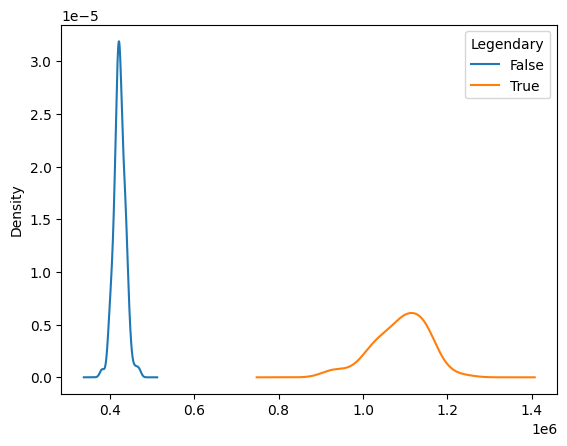

In [ ]:
#Сбор статистики по средним произведений
boot_ld42 = []
for i in range(100):
  boot_mean = mult_data.sample(frac=1, replace=True).groupby('Legendary')['Mult'].mean()
  boot_ld42.append(boot_mean)
boot_ld42 = pd.DataFrame(boot_ld42)
boot_ld42.plot(kind='density')

In [ ]:
#Проверка равенства дисперсий
stat4, p4 = f_test(boot_ld42[True], boot_ld42[False])
print(f"Статистика = {stat4:.3f}, p = {p4:5f}")
if p4 > 0.05:
  print('Не отклоняем нулевую гипотезу, дисперсии, вероятно, одинаковые')
else:
  print('Отклоняем нулевую гипотезу, дисперсии, вероятно, различаются')

Статистика = 22.483, p = 0.000000
Отклоняем нулевую гипотезу, дисперсии, вероятно, различаются


In [ ]:
stat4, p4 = st.ttest_ind(boot_ld42[True], boot_ld42[False], equal_var=False)
print(f"Статистика = {stat4:.3f}, p = {p4:5f}")
if p4 > 0.05:
  print('Не отклоняем нулевую гипотезу, среднее произведений, вероятно, одинаковые')
else:
  print('Отклоняем нулевую гипотезу, средние произведений, вероятно, различаются')

#Вывод. Существует статистически значимая разница произведений HP, Attack, Defend мужду 2 группами

Статистика = 101.537, p = 0.000000
Отклоняем нулевую гипотезу, средние произведений, вероятно, различаются


In [ ]:
#Можно выполнить проверку односторонней гипотезы со следующими нулевой и альтернативной гипотезами:
#H0 Mult(Legendary) ≥ Mult(Ord)
#H1 Mult(Legendary) < Mult(Ord)
stat4, p4 = st.ttest_ind(boot_ld4[True], boot_ld4[False], equal_var=False, alternative='less')
print(f"Статистика = {stat4:.3f}, p = {p4:5f}")
if p4 > 0.05:
  print('Не отклоняем нулевую гипотезу')
else:
  print('Отклоняем нулевую гипотезу')

#Исходя из этого можно сделать вывод о том, что значения произведений HP, Attack, Defend у легендарны покемонов
#также в среднем выше, чем у остальных

Статистика = 161.850, p = 1.000000
Не отклоняем нулевую гипотезу


<div class="alert alert-info">
<b>Задание № 5:</b>
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боёв Оук выделил четыре класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`.

Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Всё та же статистика вам в помощь!
   

Вы можете предположить, что распределение параметров защитных характеристик является нормальным для всех классов покемонов.

</div>

In [ ]:
best_defence_class = ['Rock', 'Ground', 'Steel', 'Ice']
best_defence_class

['Rock', 'Ground', 'Steel', 'Ice']

In [ ]:
#Нужно исключить из данных все те данные, которые могут совмещать в 2 классах те значения из списка
data_to_delete = pokemon[(pokemon['Class 1'].isin(best_defence_class)) & (pokemon['Class 2'].isin(best_defence_class))]
data_to_delete = data_to_delete.index + 1

data5 = pokemon[(pokemon['Class 1'].isin(best_defence_class)) | (pokemon['Class 2'].isin(best_defence_class))]
len(data5)

189

In [ ]:
data5 = data5[~data5['pid'].isin(data_to_delete)]
len(data5)

166

In [ ]:
sorted_class_data = data5.copy()
sorted_class_data['Class'] = sorted_class_data['Class 1'].apply(lambda x: x if x in best_defence_class else np.NaN)
sorted_class_data['Class'] = sorted_class_data['Class'].fillna(sorted_class_data['Class 2'])
sorted_class_data.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Class
32,33,Sandshrew,Ground,NaN,50,75,85,20,30,40,False,Ground
33,34,Sandslash,Ground,NaN,75,100,110,45,55,65,False,Ground
36,37,Nidoqueen,Poison,Ground,90,92,87,75,85,76,False,Ground
39,40,Nidoking,Poison,Ground,81,102,77,85,75,85,False,Ground
55,56,Diglett,Ground,NaN,10,55,25,35,45,95,False,Ground


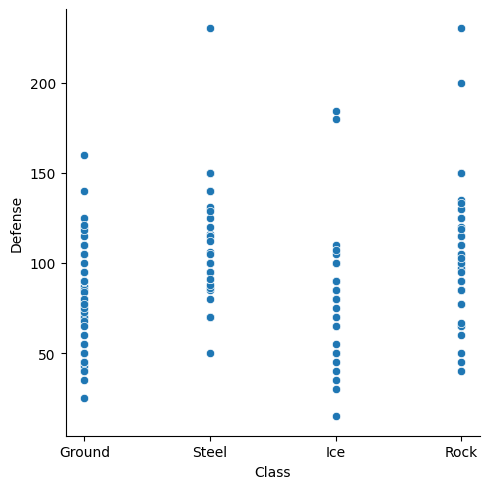

In [ ]:
sns.relplot(data=sorted_class_data, x=sorted_class_data['Class'], y=sorted_class_data['Defense'])

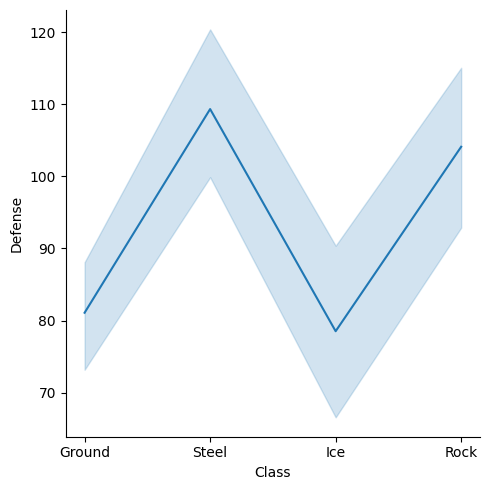

In [ ]:
sns.relplot(data=sorted_class_data, x=sorted_class_data['Class'], y=sorted_class_data['Defense'], kind = "line")

#Графики показывают, что есть некоторая разница между средними значениями четырех групп.
#Определим, является ли данная разница статистически значимой.

In [ ]:
data_list = [sorted_class_data[sorted_class_data['Class'] == value]['Defense'] for value in best_defence_class]
len(data_list)
data_list[0]

149    100
150    125
151     90
152    105
153     65
154     85
200    115
230    230
237    120
240     85
267    110
268    150
323    135
369     65
370     85
377     77
378     97
379     50
380    100
404    130
414    200
453     40
454     60
486     95
583     85
584    105
585    130
618     85
619    125
625    103
626    133
627     45
628     65
700     90
758     67
759    115
766     77
767    119
773    150
795    150
796    110
Name: Defense, dtype: int64

In [ ]:
#Исходя из условий задания. Распередление нормальное
#Прежде чем переходить к дисперсионному анализу, проверим равенство вариаций
stat5, p5 = st.levene(*data_list)

print(f"Статистика = {stat5:.5f}, p = {p5:.5f}")

if p5 < 0.05:
    print("Отклоняем нулевую гипотезу >> Вариация в группах раличается")
else:
    print("Не отклоняем нулевую гипотезу >> Вариация в группах одинаковая")

Статистика = 0.38822, p = 0.76164
Не отклоняем нулевую гипотезу >> Вариация в группах одинаковая


In [ ]:
#Теперь используем однофакторный дисперсионный анализ
f_val, p_val = st.f_oneway(*data_list)

print(f"Статистика = {f_val:.5f}, p = {p_val:.5f}")

if p_val > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика = 8.82042, p = 0.00002
Отклоняем нулевую гипотезу, средние, вероятно, различаются


In [ ]:
#Второй способ вычисления статистики
from statsmodels.formula.api import ols
import statsmodels.api as sm

model = ols('Defense ~ Class',
            data=sorted_class_data).fit()
res = sm.stats.anova_lm(model, type=1)

print(res)
#p_val = 0.000019, что соотв пред расчетам

             df         sum_sq       mean_sq         F    PR(>F)
Class       3.0   30025.078102  10008.359367  8.820417  0.000019
Residual  162.0  183818.319488   1134.680984       NaN       NaN


In [ ]:
print(str(model.summary()))

                            OLS Regression Results                            
Dep. Variable:                Defense   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     8.820
Date:                Tue, 16 Apr 2024   Prob (F-statistic):           1.89e-05
Time:                        03:28:14   Log-Likelihood:                -817.35
No. Observations:                 166   AIC:                             1643.
Df Residuals:                     162   BIC:                             1655.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         81.0769      4.671     17.

In [ ]:
#Обнаружив статистически значимый эффект нужно провести дополнительное исследование с учетом проблемы множественного сравнения.
#Используем критерий Тьюки
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=sorted_class_data['Defense'].values,
                          groups=sorted_class_data['Class'], alpha=0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
Ground    Ice  -2.5618 0.9862 -22.0232 16.8997  False
Ground   Rock  23.0206 0.0071   4.7576 41.2836   True
Ground  Steel  28.2481 0.0006   9.8579 46.6383   True
   Ice   Rock  25.5824 0.0077   5.1325 46.0323   True
   Ice  Steel  30.8098 0.0008  10.2463 51.3734   True
  Rock  Steel   5.2274 0.8976 -14.2058 24.6607  False
-----------------------------------------------------


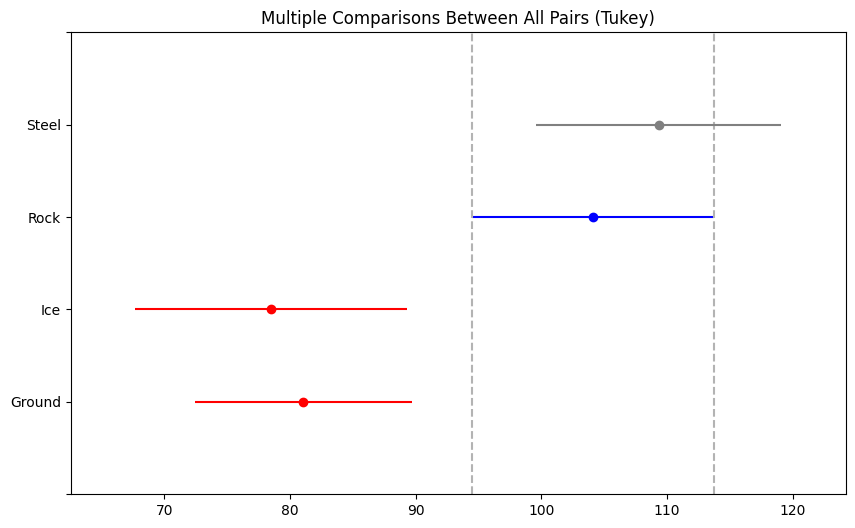

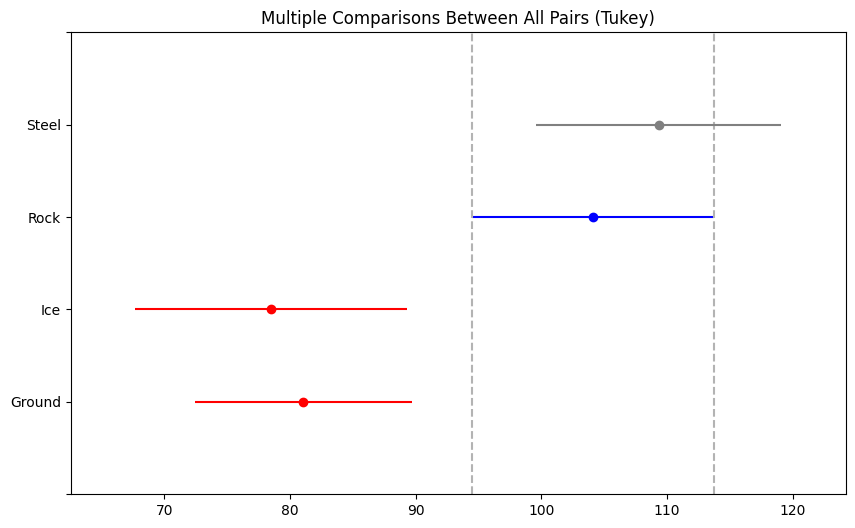

In [ ]:
tukey.plot_simultaneous(comparison_name="Rock")

#Вывод. Обнаружили, что линии Ground и Ice статистически отличаются от Rock и Steel,
#что опровергает предположение профессора Оуки, что данные классы покемонов не отличаются по уровню защиты.